<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/tps/1c2024/Practica_2_completa_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Clase 2: Adquisición de datos: introducción a Pandas y a Seaborn
###Pandas
Pandas es una librería de código abierto diseñada específicamente para la manipulación y el análisis de datos en Python. Esta permite leer facilmente archivos en distintos formatos y en bases de datos SQL, e incorpora nuevas estructuras:

- Series: una dimensión
- DataFrame: dos dimensiones (tablas)
- Panel: tres dimensiones (cubos)

Es una herramienta poderosa que ayuda a los usuarios a limpiar, transformar y analizar datos de una manera rápida y eficiente. Se basa en los arrays de NumPy, por lo que permite acceder a los valores mediante un índice, o nombre de filas y columnas.

Como se imagina, lo primero que debemos hacer es importar la librería. Por convención:

In [ ]:
import pandas as pd

### Fuente de datos 1: Planillas de Excel

Para mostrar cómo se accede a los datos de una planilla de excel, vamos a descargar **la velocidad máxima del viento en la Ciudad de Buenos Aires, entre enero de 1991 y febrero de 2024** utilizando el siguiente link: https://www.estadisticaciudad.gob.ar/eyc/?p=27706

Una vez descargado, abra el archivo **MA_AX05.xlsx** y note su estructura.

Si no usaramos Colab, podríamos colocar la ruta del archivo como parámetro de la función `pd.read_excel()`, pero en nuestro caso, tenemos un par de pasos extras:

In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving MA_AX05.xlsx to MA_AX05.xlsx


In [ ]:
import io

file_1 = io.BytesIO(uploaded['MA_AX05.xlsx'])

In [ ]:
# Se crea un DataFrame y lo llamamos df_vientos
df_vientos = pd.read_excel(file_1)

# Veamos las primera 5 filas
df_vientos.head()

,Velocidad máxima del viento. Ciudad de Buenos Aires. Enero 1991 / Febrero 2024,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68
0,Mes,1991,NaN,1992,NaN,1993,NaN,1994,NaN,1995,...,2020,NaN,2021,NaN,2022,NaN,2023,NaN,2024,NaN
1,NaN,Nudos,km/h,Nudos,km/h,Nudos,km/h,Nudos,km/h,Nudos,...,Nudos,Km/h,Nudos,Km/h,Nudos,Km/h,Nudos,Km/h,Nudos,Km/h
2,Enero,38,70.376,40,74.08,40,74.08,38,70.376,42,...,37,68,36,67,34,63,24,44,26,48
3,Febrero,19,35.188,38,70.376,34,62.968,20,37.04,41,...,27,50,28,52,44,81,34,63,16,30
4,Marzo,32,59.264,50,92.6,38,70.376,24,44.448,39,...,25,46,32,59,33,62,28,52,…,…


Note que se generó el DataFrame llamado **df_vientos** pero no se vé como esperaríamos. Esto se debe a que debemos pasar parámetros que cambien la forma en que Pandas importa el archivo, ya que con los predefinidos no es suficiente.

Algunos parámetros útiles son:
- `io`: la ruta del archivo que se desea importar
- `sheet_name`: el nombre de la hoja o pestaña (si no se establece un valor, toma la de posición 0)
- `header`: se establece el encabezado de las columnas
- `usecols`: se establece el rango de columnas a importar, por ejemplo "A:E" o "A,C"
- `nrows`: Número de filas que se desea tomar
- `skiprows`: si el archivo contiene filas al principio que no deseo, se puede pasar el parámetro skip_rows para eliminar un número específico de filas.

En caso de querer saber más sobre los parámetros, consultar en la documentación: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

Veamos algunos ejemplos:

In [ ]:
df_vientos_explicación = pd.read_excel(file_1, sheet_name='Ficha técnica', header=1)
df_vientos_explicación.head()

,Archivo,MA_AX05
0,Área Temática,Ambiente
1,Tema,Clima
2,Subtema,No corresponde
3,Serie,Velocidad máxima del viento
4,Objetivo,Llevar un registro de la velocidad del viento ...


In [ ]:
df_vientos = pd.read_excel(file_1, sheet_name='MA_AX05', header=[1,2], nrows=12)
df_vientos.head(12)

Mes  1991          1992          1993          1994  \
   Unnamed: 0_level_1 Nudos    km/h Nudos    km/h Nudos    km/h Nudos   
0               Enero    38  70.376    40  74.080    40  74.080    38   
1             Febrero    19  35.188    38  70.376    34  62.968    20   
2               Marzo    32  59.264    50  92.600    38  70.376    24   
3               Abril    40  74.080    18  33.336    40  74.080    34   
4                Mayo    26  48.152    40  74.080    33  61.116    55   
5               Junio    35  64.820    30  55.560    43  79.636    33   
6               Julio    18  33.336    30  55.560    20  37.040    40   
7              Agosto    38  70.376    38  70.376    40  74.080    40   
8          Septiembre    32  59.264    43  79.636    17  31.484    25   
9             Octubre    40  74.080    44  81.488    34  62.968    45   
10          Noviembre    30  55.560    34  62.968    43  79.636    30   
11          Diciembre    42  77.784    34  62.968    36  66.672    50   

             1995  ...  2020       2021       2022       2023       2024       
       km/h Nudos  ... Nudos Km/h Nudos Km/h Nudos Km/h Nudos Km/h Nudos Km/h  
0    70.376    42  ...    37   68    36   67    34   63    24   44    26   48  
1    37.040    41  ...    27   50    28   52    44   81    34   63    16   30  
2    44.448    39  ...    25   46    32   59    33   62    28   52     …    …  
3    62.968    21  ...    27   50    26   48    31   57    31   57     …    …  
4   101.860    14  ...    32   59    35   65    30   56    14   26     …    …  
5    61.116    18  ...    34   63    17   31    24   44    28   52     …    …  
6    74.080    35  ...    25   46    29   54    27   50    33   62     …    …  
7    74.080    21  ...    26   48    31   57    16   30    32   59     …    …  
8    46.300    23  ...    25   46    27   50    36   67    33   62     …    …  
9    83.340    31  ...    27   50    34   63    32   59    33   62     …    …  
10   55.560    26  ...    26   48    31   57    27   50    38   70     …    …  
11   92.600    33  ...    33   62    27   50    28   52    54  100     …    …  

[12 rows x 69 columns]

Note que en este caso, al seleccionar dos filas como escabezado, se genera un Multiindex:

In [ ]:
df_vientos[(1991),('Nudos')]

,1991
,Nudos
0,38
1,19
2,32
3,40
4,26
5,35
6,18
7,38
8,32


In [ ]:
# Ver el nombre de la columnas del DataFrame
print('Encabezado de las columnas:', df_vientos.columns)

Encabezado de las columnas: MultiIndex([('Mes', 'Unnamed: 0_level_1'),
            ( 1991,              'Nudos'),
            ( 1991,               'km/h'),
            ( 1992,              'Nudos'),
            ( 1992,               'km/h'),
            ( 1993,              'Nudos'),
            ( 1993,               'km/h'),
            ( 1994,              'Nudos'),
            ( 1994,               'km/h'),
            ( 1995,              'Nudos'),
            ( 1995,               'km/h'),
            ( 1996,              'Nudos'),
            ( 1996,               'km/h'),
            ( 1997,              'Nudos'),
            ( 1997,               'km/h'),
            ( 1998,              'Nudos'),
            ( 1998,               'km/h'),
            ( 1999,              'Nudos'),
            ( 1999,               'km/h'),
            ( 2000,              'Nudos'),
            ( 2000,               'km/h'),
            ( 2001,              'Nudos'),
            ( 2001,       

¿Cómo haríamos si sólo queremos ver los datos de la velocidad del viento del año 2023 y con unidad km/h?

In [ ]:
df_vientos_2023 = pd.read_excel(file_1, sheet_name='MA_AX05', header=2, nrows=12, usecols="A,BO")
df_vientos_2023.head(12)

,Unnamed: 0,Km/h.7
0,Enero,44
1,Febrero,63
2,Marzo,52
3,Abril,57
4,Mayo,26
5,Junio,52
6,Julio,62
7,Agosto,59
8,Septiembre,62
9,Octubre,62


Renombramos las columnas:

In [ ]:
print('Encabezado de las columnas:', df_vientos_2023.columns)

Encabezado de las columnas: Index(['Unnamed: 0', 'Km/h.7'], dtype='object')


In [ ]:
df_vientos_2023 = df_vientos_2023.rename(columns={'Unnamed: 0': 'Mes', 'Km/h.7': 'Velocidad máxima (Km/h)'})
df_vientos_2023.head()

,Mes,Velocidad máxima (Km/h)
0,Enero,44
1,Febrero,63
2,Marzo,52
3,Abril,57
4,Mayo,26


Hasta ahora aprendimos 3 funciones de pandas:
- `.head()`: devuelve las primeras 5 rows. Si quisieramos ver las últimas es `.tail()`
- `.columns`: devuelve una lista con los encabezados de las columnas
- `.rename()`: se ingresa un diccionario con el encabezado actual y los nuevos.

Otras funciones muy útiles que nos brindan información rápida sobre nuestro DataFrame son:
- `.shape`: devuelve una tupla con filas y columnas
- `.info()`: brinda el número de columnas y filas, tipo de dato y cantidad de valores no nulos por columna. Además indica el uso de la memoria.
- `.dtypes`: otra forma de ver los tipos de datos por columna
- `.describe()`: tomando sólo los valores numéricos, brinda la media, el valor máximo, el mínimo, desvío, etc.

In [ ]:
df_vientos_2023.shape

(12, 2)

In [ ]:
df_vientos_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Mes                      12 non-null     object
 1   Velocidad máxima (Km/h)  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [ ]:
df_vientos_2023.dtypes

,0
Mes,object
Velocidad máxima (Km/h),int64


Note que no hay valores nulos.

In [ ]:
df_vientos_2023.describe()

,Velocidad máxima (Km/h)
count,12.000000
mean,59.083333
std,17.217635
min,26.000000
25%,52.000000
50%,60.500000
75%,62.250000
max,100.000000


### Fuente de datos 2: CSV

Las siglas CSV provienen del inglés "Comma Separated Values", por lo que un archivo CSV es cualquier archivo de texto en el cual los caracteres están separados por comas, haciendo una especie de tabla en filas y columnas.

Las columnas quedan definidas por el separador, que puede ser una coma `(,)`, punto y coma `(;)`, un espacio o un tab, mientras que cada fila se define mediante una línea adicional en el texto.

Para mostrar un ejemplo, usaremos los resultados de un ensayo realizado por el Labdin que se encuentra en las páginas de la materia, llamado **Ensayo_cribas.txt**. El ensayo consistió en medir las vibraciones en una losa debidas al accionar de dos cribas que andaban en simultáneo en una planta industrial, brindándose 3 valores correspondientes a los ejes X, Y, Z en unidad voltaje.

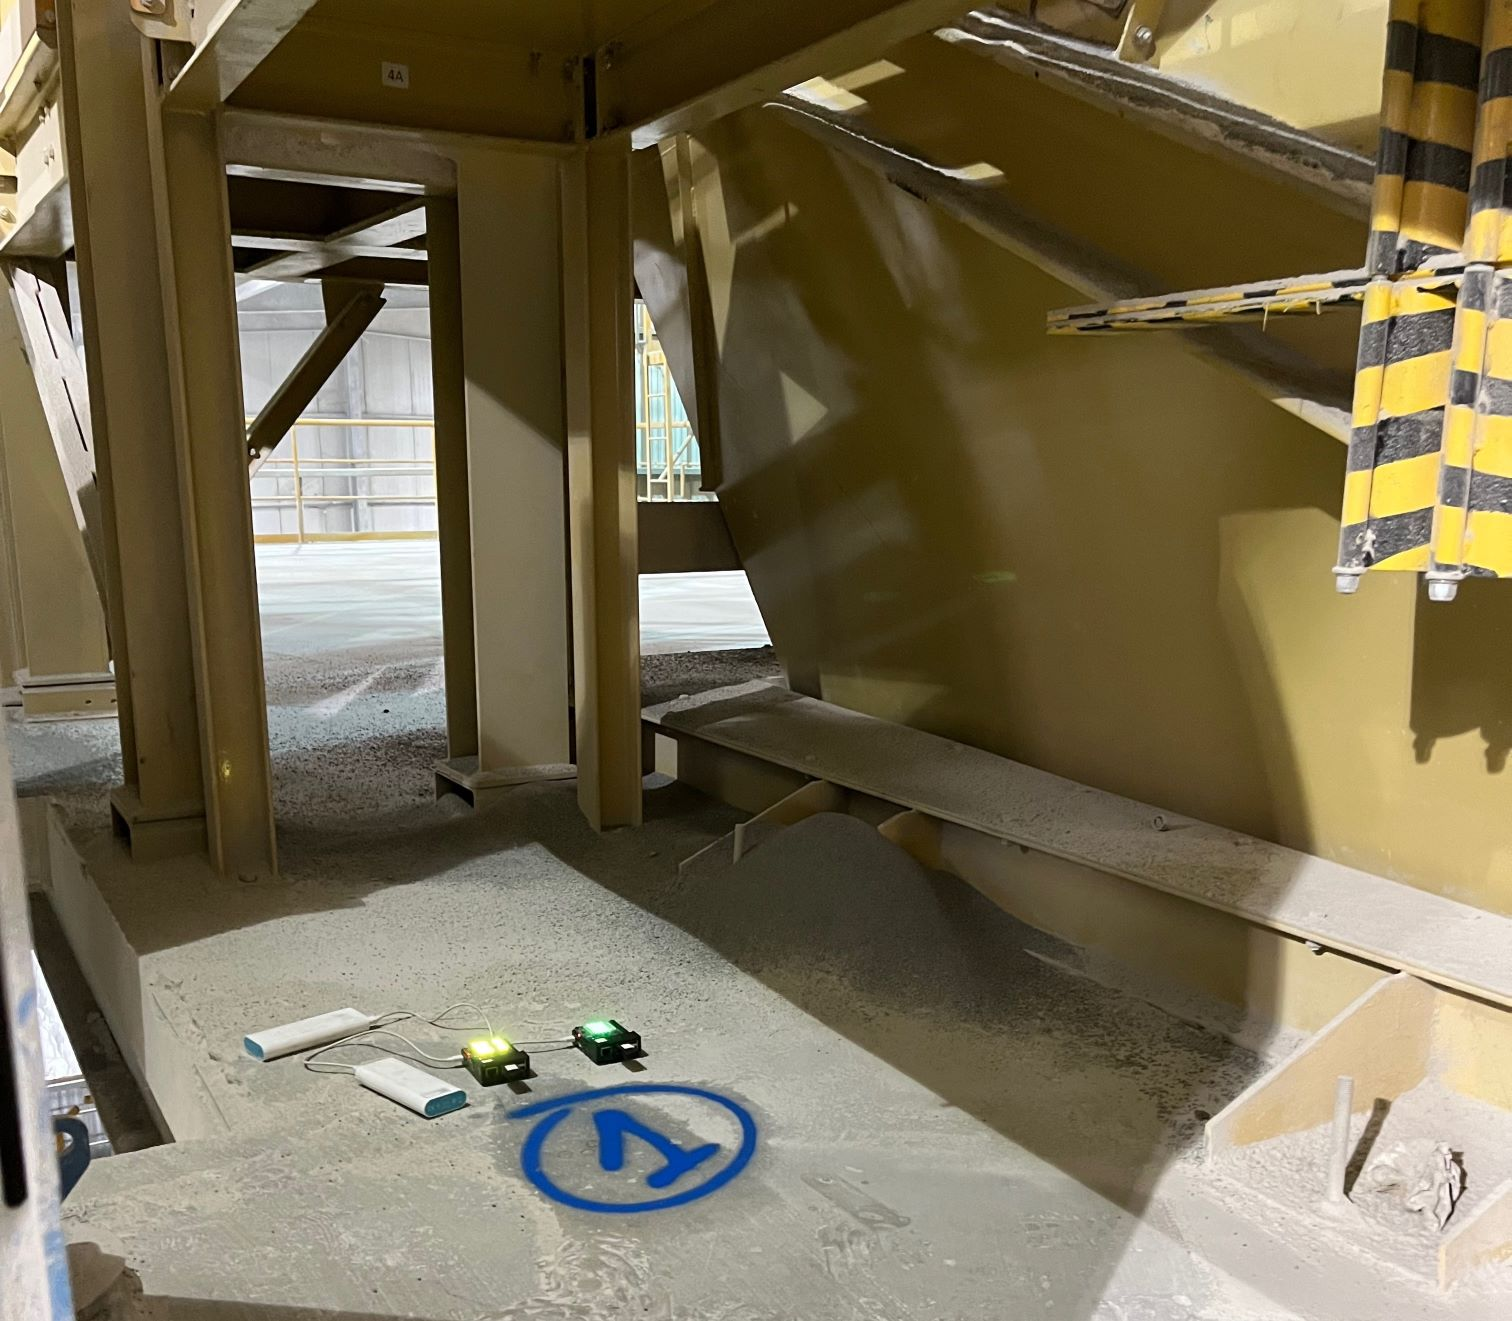

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ensayo_cribas.txt to Ensayo_cribas.txt


In [ ]:
file_2 = io.BytesIO(uploaded['Ensayo_cribas.txt'])

De manera análoga a como se ha hecho anteriormente, usando la función `pd.read_csv()` e indicando la ruta del archivo como parámetro, se pueden importar los datos. De hecho, `io`, `header`, `usecols`, `nrows` son parámetros comunes a ambas funciones, pero vale la pena destenernos en el parámetro `sep`. Este, de manera estándar es una coma, pero se pueden indicar otros valores.

Si desea saber más sobre los parámetros, consultar en la documentación: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [ ]:
df_cribas = pd.read_csv(file_2, header=5, sep='\t')
df_cribas

,Time,v0,v1,v2,y0,y1,y2
0,0.000,0.188465,-3.976620,-0.247035,0.188465,-3.976620,-0.247035
1,0.001,0.152773,-3.992409,-0.112516,0.152773,-3.992409,-0.112516
2,0.002,0.126241,-4.011355,0.016639,0.126241,-4.011355,0.016639
3,0.003,0.105079,-4.028091,0.146140,0.105079,-4.028091,0.146140
4,0.004,0.088022,-4.041353,0.264270,0.088022,-4.041353,0.264270
...,...,...,...,...,...,...,...
15995,15.995,0.137612,-4.053984,-0.247035,0.137612,-4.053984,-0.247035
15996,15.996,0.115186,-4.060931,-0.247035,0.115186,-4.060931,-0.247035
15997,15.997,0.093708,-4.072299,-0.241667,0.093708,-4.072299,-0.241667
15998,15.998,0.066544,-4.086824,-0.204722,0.066544,-4.086824,-0.204722


Ahora podríamos limpiar un poco nuestros datos:
- Las columnas V0, V1, V2, en realidad son Vx, Vy, Vz (en voltaje)
- Las columnas y0, y1, y2 deberían informar los valores de la aceleración en X, Y, Z pero dado que no se cargó el factor de escala, no son datos de utilidad.
- Crear los resultados correctos en m/s2 utilizando el factor de escala 0.3, 0.3, 1 para los ejes X, Y, Z respectivamente.

In [ ]:
df_cribas.columns

Index(['Time', 'v0', 'v1', 'v2', 'y0', 'y1', 'y2'], dtype='object')

In [ ]:
# Eliminamos las columnas (axis=1) de la lista
df_cribas = df_cribas.drop(['y0', 'y1', 'y2'], axis=1)
df_cribas.head()

,Time,v0,v1,v2
0,0.000,0.188465,-3.976620,-0.247035
1,0.001,0.152773,-3.992409,-0.112516
2,0.002,0.126241,-4.011355,0.016639
3,0.003,0.105079,-4.028091,0.146140
4,0.004,0.088022,-4.041353,0.264270


In [ ]:
# Renombro las columnas
df_cribas = df_cribas.rename(columns={'v0': 'vx', 'v1': 'vy', 'v2': 'vz'})
df_cribas.head()

,Time,vx,vy,vz
0,0.000,0.188465,-3.976620,-0.247035
1,0.001,0.152773,-3.992409,-0.112516
2,0.002,0.126241,-4.011355,0.016639
3,0.003,0.105079,-4.028091,0.146140
4,0.004,0.088022,-4.041353,0.264270


In [ ]:
# Agrego columnas con el factor de escala:
df_cribas['ax'] = df_cribas['vx'] * 0.3
df_cribas['ay'] = df_cribas['vy'] * 0.3
df_cribas['az'] = df_cribas['vz']
df_cribas.head()

,Time,vx,vy,vz,ax,ay,az
0,0.000,0.188465,-3.976620,-0.247035,0.056539,-1.192986,-0.247035
1,0.001,0.152773,-3.992409,-0.112516,0.045832,-1.197723,-0.112516
2,0.002,0.126241,-4.011355,0.016639,0.037872,-1.203407,0.016639
3,0.003,0.105079,-4.028091,0.146140,0.031524,-1.208427,0.146140
4,0.004,0.088022,-4.041353,0.264270,0.026407,-1.212406,0.264270


Utilizando las funciones ya aprendidas para analizar el DataFrame:

In [ ]:
df_cribas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    16000 non-null  float64
 1   vx      16000 non-null  float64
 2   vy      16000 non-null  float64
 3   vz      16000 non-null  float64
 4   ax      16000 non-null  float64
 5   ay      16000 non-null  float64
 6   az      16000 non-null  float64
dtypes: float64(7)
memory usage: 875.1 KB


In [ ]:
df_cribas.describe()

,Time,vx,vy,vz,ax,ay,az
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,7.999500,-0.001300,-4.170580,-0.000074,-0.000390,-1.251174,-0.000074
std,4.618946,0.107529,0.093563,0.337874,0.032259,0.028069,0.337874
min,0.000000,-0.336715,-4.486592,-1.241402,-0.101014,-1.345978,-1.241402
25%,3.999750,-0.077781,-4.237448,-0.235036,-0.023334,-1.271234,-0.235036
50%,7.999500,-0.006733,-4.177135,-0.008943,-0.002020,-1.253140,-0.008943
75%,11.999250,0.077599,-4.099455,0.228578,0.023280,-1.229836,0.228578
max,15.999000,0.331548,-3.923886,1.332180,0.099464,-1.177166,1.332180


### Fuente de datos 3: API REST

#### **¿Qué es una API?**

Una API, del inglés "Application Programming Interface", es un conjunto de reglas y protocolos que permiten a diferentes aplicaciones interactuar y comunicarse entre sí.

####**¿Qué es una REST API?**

En particular, las API de tipo REST ("REpresentational State Transfer") son una forma de permitir que diferentes aplicaciones se comuniquen entre sí a través de internet utilizando el protocolo HTTP.

Siendo la interfaz de una REST API de tipo cliente - servidor: nuestra computadora (el cliente) se comunica y le pide cosas al servidor. Por ejemplo: en internet tenemos servers, como twitter que puede ser un servidor o correr en un servidor, y clientes, nuestra computadora que intenta acceder a la API. El server es una computadora como la nuestra pero se llama server porque sirve a muchos clientes.

Sus características:
- Stateless (Comunicación sin estado): el server no sabe quien solicita la data, ya que muchas personas hacen pedidos al mismo tiempo.
- Cacheable: Las respuestas de una solicitud son cacheadas, es decir, se almacenan temporalmente los datos de una respuesta HTTP para reducir el tiempo de carga de una página o aplicación.
- Interfaz uniforme: REST utiliza una interfaz uniforme para acceder a los recursos, lo que nos permite comunicamos con distintos servidores.

####**¿Cómo se ve una API?**

Luce algo así: https://alerta.ina.gob.ar/a5/apiUI

Observamos verbos, que son los método HTTP que se refieren a la acción que se debe realizar en un request HTTP. Los más comunes son: **GET, PUT, POST y DELETE**.

Veamos un ejemplo:

Para un endpoint : http://api.example.com/users

Si usamos:
- GET: solicita una lista de usuarios por /users.
- PUT: reemplaza la colección de usuarios con una nueva que se enviará
- POST: envía un nuevo usuario al servidor
- DELETE: elimina la coleccion de usuarios

Para nuestro ejemplo, vamos a usar la **API del Instituto Nacional del Agua**.

Para comenzar, debemos importar la libreria request para hacer pedidos en python. Usando `request.get()` y entregando el url de la API:

In [ ]:
import requests

url = "https://alerta.ina.gob.ar/a5"

response = requests.get(url)

response

Observe el Response Code (Código de estado) obtenido: **404 Not Found**: El recurso solicitado no se pudo encontrar en el servidor.

Esto se debe a que necesitamos enviarle ciertos datos a la API para que nos pueda brindar información. **¿Qué datos necesitas enviar una API?** Depende de la API. Las API normalmente brindan una referencia extensa de exactamente todo lo que puede enviarles para que puedan devolvernos los datos que nos interesan.

Entonces vamos a hacer un pedido un poco más puntual:

In [ ]:
import requests

# La interfaz del INA está en https://alerta.ina.gob.ar/pub/gui/apibase

url = "https://alerta.ina.gob.ar/pub/datos/datos&timeStart=2024-02-10&timeEnd=2024-03-18&seriesId=85&siteCode=85&varId=2&format=json"

response = requests.get(url)

response

<Response [200]>

Ahora el Response Code (Código de estado) obtenido es **200 OK**: La solicitud se procesó correctamente y se devolvió con éxito.

**¿Qué hicimos?** Tuvimos que indicarle el tipo de observación (puntual), la estación (85: Buenos Aires) y el período de tiempo que queremos analizar.

In [ ]:
import json

data = response.json()
print("Datos obtenidos correctamente desde la API:")
# data

Datos obtenidos correctamente desde la API:


In [ ]:
df = pd.DataFrame.from_dict(data["data"])
df.head()

,obs_id,timestart,timeend,valor,timeupdate
0,22301256262,2024-02-10T00:00:00,2024-02-10T00:00:00,0.80,2024-02-10T18:01:04.109259
1,22300458477,2024-02-10T00:45:00,2024-02-10T00:45:00,0.90,2024-02-10T06:01:17.392662
2,22300458479,2024-02-10T01:45:00,2024-02-10T01:45:00,0.80,2024-02-10T06:01:17.392662
3,22300458485,2024-02-10T02:45:00,2024-02-10T02:45:00,0.78,2024-02-10T06:01:17.392662
4,22300458490,2024-02-10T03:45:00,2024-02-10T03:45:00,0.70,2024-02-10T06:01:17.392662


**¿Cómo podríamos seleccionar los datos de una manera fácil?** Como se dijo anteriormente, la API provee documentación. En nuestro caso, contamos con una lista para elegir el tipo de dato que deseamos ver y una visualización del mapa de Argentina para escoger la estación.

Por ejemplo, ingresando a:

https://alerta.ina.gob.ar/pub/mapa **> Hidrométrios > observados > Niveles** y seleccionando en el mapa estación: **Buenos Aires: serieId 85**, observamos los datos disponibles. Allí, clickeando en **Servicios Web > Portal de los Servicios Web: gráfico** podemos ver un gráfico que resulta de los parámetros seleccionados.

De esta forma, podemos filtrar el tiempo y copiar el url generado con el endpoint que nos interesa.

In [ ]:
# url_api ="https://alerta.ina.gob.ar/pub/datos/datos&timeStart=2024-02-10&timeEnd=2024-03-18&seriesId=85&siteCode=85&varId=2&format=json"

# response = requests.get(url_api)
# datos = response.json()

# df=pd.DataFrame.from_dict(datos["data"])
# df.head()

Note que se podría haber generado ese url desde el código, pero la visualización nos simplificó el proceso:

In [ ]:
Endpoint = "https://alerta.ina.gob.ar/pub/datos/datos&"
timeStart = "2024-02-10"
timeEnd = "2024-03-18"
seriesId = "85"
siteCode = "85"
varId = 2

url = (f"{Endpoint}&timeStart={timeStart}&timeEnd={timeEnd}&seriesId={seriesId}&siteCode={siteCode}&varId={varId}&format=json")
print(url)


https://alerta.ina.gob.ar/pub/datos/datos&&timeStart=2024-02-10&timeEnd=2024-03-18&seriesId=85&siteCode=85&varId=2&format=json


## Seaborn

Seaborn es una librería de visualización, utilizada para la epresentación estadística, ya que muestra fácilmente la relación que guardan los datos para detectar tendencias y patrones.

Se integra estrechamente con las estructuras de datos de pandas y se basa en matplotlib, por lo que algunos de los métodos de matplotlib se utilizan con seaborn.

Como ya supondrá, el primer paso es importar la librería. Por convención:

In [ ]:
import seaborn as sns

Note que con la función `lineplot()` y estableciendo las columnas del DataFrame para cada eje, se puede realizar un gráfico de línea

<Axes: xlabel='timestart', ylabel='valor'>

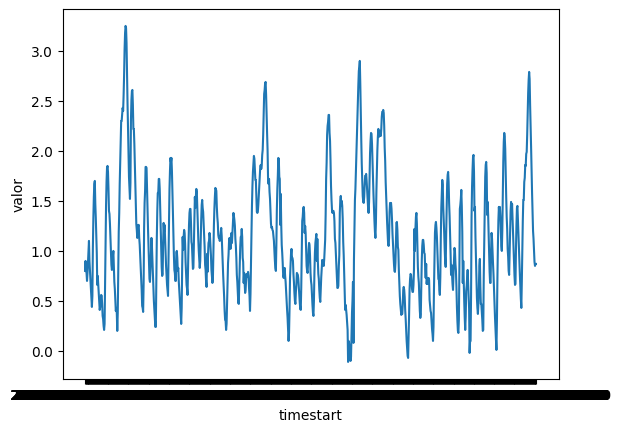

In [ ]:
sns.lineplot(x = "timestart", y = "valor", data = df)

Note que no se pueden leer los valores del eje x. Utilizando matplotlib se puede mejorar la legilibilidad, por ejemplo, aumentando el tamaño de la figura o seleccionando algunos valores del eje.

In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='timestart', ylabel='valor'>

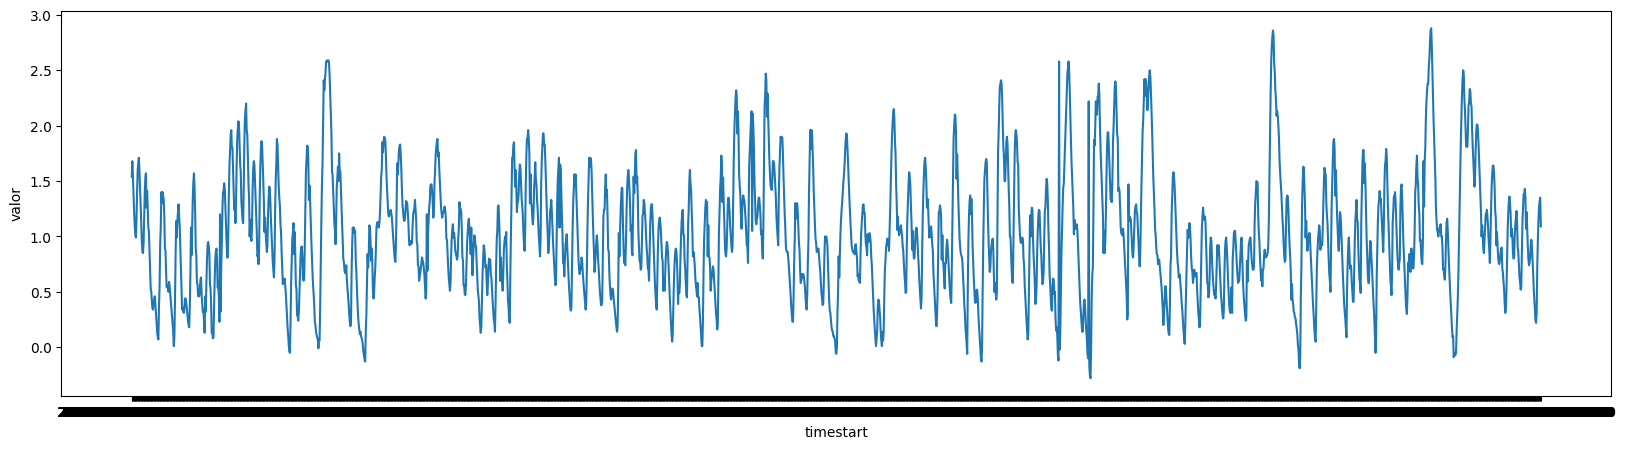

In [ ]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x = "timestart", y = "valor", data = df)

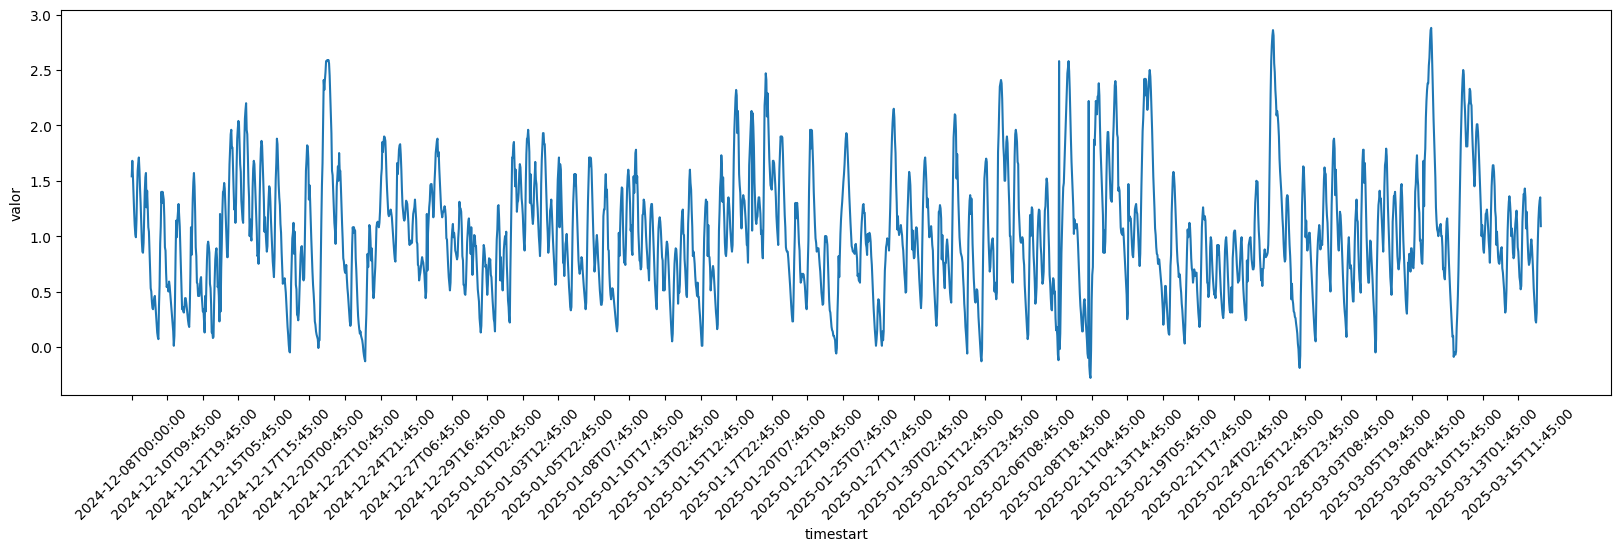

In [ ]:
fig = plt.subplots(figsize=(20, 5))

sns.lineplot(x = "timestart", y = "valor", data = df)

plt.xticks(ticks=df["timestart"][::60], rotation=45)  # Mostrar cada 60 muestras
plt.show()

También, se puede modificar el aspecto de la línea de manera similar a como se realiza con Matplotlib

[Text(0.5, 1.0, 'Nivel en Buenos Aires'),
 Text(0.5, 0, 'Fecha'),
 Text(0, 0.5, 'Altura (m)')]

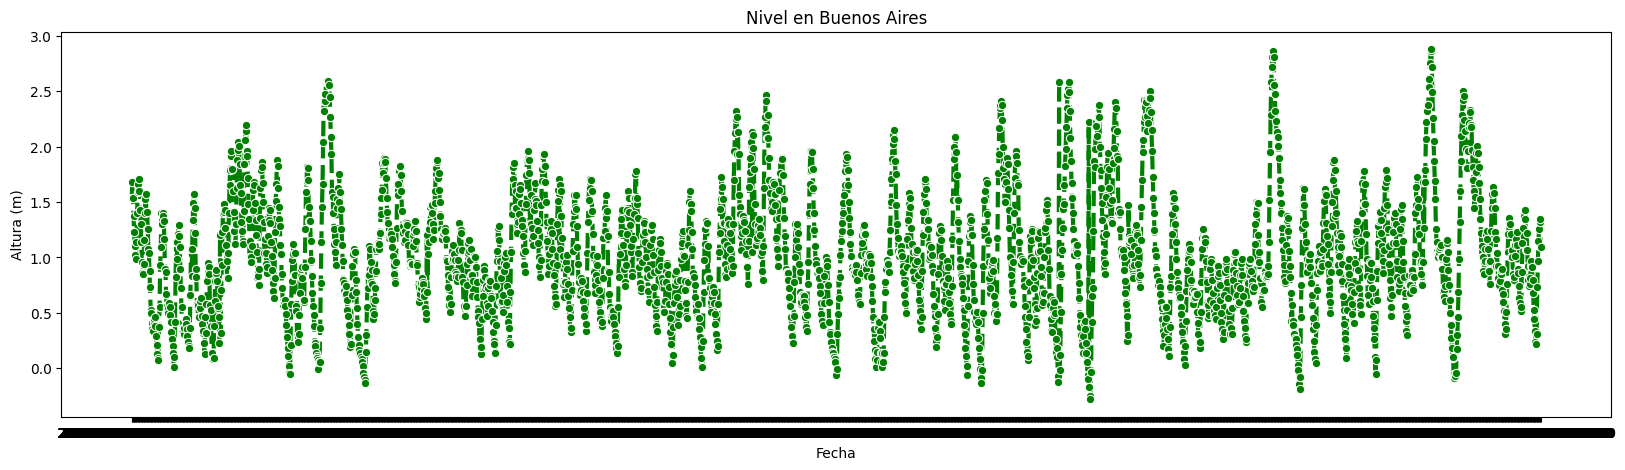

In [ ]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x = "timestart", y = "valor", data = df,
             marker = "o", color = "green", linestyle = "dashed",  linewidth = 3
             ).set(title="Nivel en Buenos Aires", xlabel="Fecha", ylabel="Altura (m)")